## __INTRODUCTION__  

### __ARTIFICIAL NEURAL NETWORKS__
* ML models that have a graph structure,inspired by the brain structure, with many interconnected units called artificial naurons https://www.youtube.com/watch?v=3JQ3hYko51Y
* ANN  have the ability to learn from raw data imputs, but it also makes them slower    
              
                
            
### __TENSORFLOW__
* CREATED AND MAINTAINED BY GOOGLE, 
* Different APIs (Application Programming Interface)
    * (a) low level graph API 
    * (b) High level Keras API
* TF on GPUs
    * it requires different version of a library, 
    * available in conda,
        > conda install tensorflow-gpu==1.12.0 #or newer version
    * requires: compatible NVIDIA graphic card
    * list is available cards is here: https://developer.nvidia.com/cuda-gpus
                
### __COMPUTATION GRAPHS__
* basic concept used in TF to specify how different elements interact with eaxch other
        - example:
            + we wish to implement liear regression 
              y = ax + b, where a, abd b are the sloe and intercept parameters,
                                x asre imput data, 
                                y are predictions, that weill be used to compare with the output
                          y       (y without a hat) usunig huber loss
                           \        
             a              loss       - each node of the grath is a step in our computation     
              \            /           - in TF data values are called TENSORS (3D matrices)
               * -> + -> y^            - in TF we first define a graph, and then we feed the data flows 
              /     |                    through the graph
             x      b
    
    
    
    
### __LOSS FUNCTIONS__
* TF implements only basic set ot loss funcitons
* more can be added by hand, using numpy-like functions eg ,ean, sqrt etc..., chekck for names becuase these are a bit different then in numpy
* https://www.tensorflow.org/api_docs/python/tf/keras/losses

### __TF OPTIMAZERS__
* https://www.tensorflow.org/api_docs/python/tf/keras/optimizers#top_of_page

### __Code Examples__
* lin regression with tf2, from scratch https://towardsdatascience.com/get-started-with-tensorflow-2-0-and-linear-regression-29b5dbd65977
* classificaiton example: https://stackabuse.com/tensorflow-2-0-solving-classification-and-regression-problems/


In [5]:
import matplotlib.pyplot as plt # for making plots, 
import matplotlib as mpl # to get some basif functions, heping with plot mnaking
import numpy as np # support for multi-dimensional arrays and matrices
import pandas as pd # library for data manipulation and analysis
import random # functions that use and generate random numbers
import glob # lists names in folders that match Unix shell patterns
import re # module to use regular expressions, 
import os # allow changing, and navigating files and folders, 
import seaborn as sns # advance plots, for statistics,
import scipy.stats as stats  # library for statistics and technical programming, 
%matplotlib inline
%config InlineBackend.figure_format ='retina' # For retina screens (mac)


In [3]:
import tensorflow as tf
print(tf.__version__)

2.4.1


## Example 1. implement linear regression with TF 

data:  (1000, 2)
labels:  (1000,)


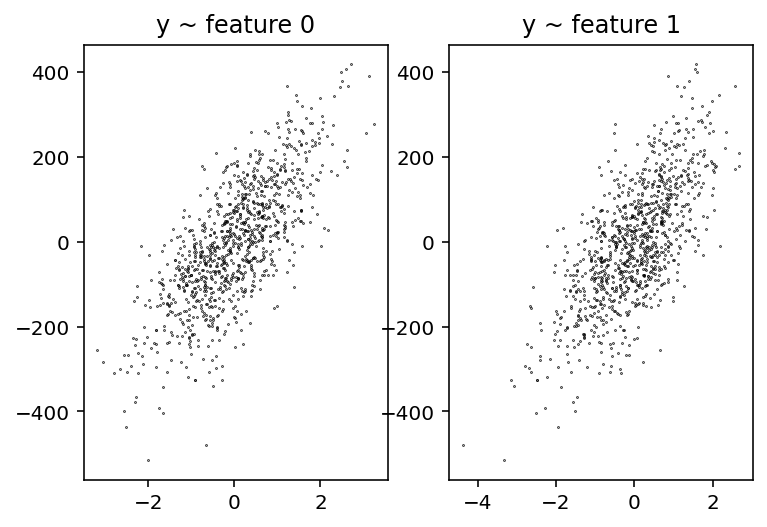

In [14]:
from sklearn.datasets import make_regression 

# create the data
X, y = make_regression(    
    n_samples=1000,
    n_features=2,
    n_informative=2
)
# chek the data
print("data: ", X.shape)
print("labels: ", y.shape) 

# plot the data
''' i tested different number of features, 
    thus this funciton handles them all
    sorry for small complications, 
'''
if X.shape[1]==1:
    plt.scatter(X,y, s=0.1, c="black")
else:
    fig, axs = plt.subplots(nrows=1, ncols=2)
    i=-1
    for ax in axs.flat:
        i+=1
        if i<X.shape[1]: 
            ax.scatter(X[:,i],y, s=0.1, c="black")
            ax.set_title(f'y ~ feature {i}')
        else: pass
plt.show()

### Part 1. DEFINE THE MODEL FOR TF
    
#### Step 1. Define Variables
- def. dtype is tf.int32
- variables are provided to session in list with operations
- they can be modified by the operations
- variables are returned at each session, even if not chnaged
- they need an initial value

In [15]:
a0   = tf.Variable(initial_value=0, dtype=tf.float32) # Feature 0 coeff.
a1   = tf.Variable(initial_value=0, dtype=tf.float32) # Feature 1 coeff.
b    = tf.Variable(initial_value=0, dtype=tf.float32) # Intercept

#### Step 2. Define Placeholders
A TensorFlow placeholder is simply a variable that we will assign data to at a later date. It allows us to create our operations and build our computation graph, without needing the data
- Must be provided externally to the session,
- IT WILL NOT BE CHNAGED by the operations, 
- NOT RETURNED,
- given to tf session as dictionary:
    * {key:value}
        * where key is as in below,
        * value is name of df, array, constant, list etc,

In [16]:
# Step 2. Define Placeholders
"""https://indianaiproduction.com/create-tensorflow-placeholder/"""

# placeholders are not executable immediately so we need to disable eager exicution in TF 2 not in 1
tf.compat.v1.disable_eager_execution()

x   = tf.compat.v1.placeholder(dtype=tf.float32) # Input
y   = tf.compat.v1.placeholder(dtype=tf.float32) # Target
lr  = tf.compat.v1.placeholder(dtype=tf.float32) # Learning rate for optimizer     

#### Step 3. Define Operations, in sub-steps a-d
* Four items are required:
    * (a) Define how do we make predicitons, eg: y_hat = 2a + 1
    * (b) Define Loss Function eg: MSE
    * (c) Define How you will optimaze the parameters in a) eg. with SGD
    * (d) Define training operation on a loss function 
        * eg: minimaze, maximaze etc..
* important:
    * a, b, and d must be given to session, 
    * d, is defined on d, so c, doenst have to given, or even change,
    
PROBLEM WITH EAGER TENSOR
* __Eager execution__ is a powerful execution environment that evaluates operations immediately. It does not build graphs, and the operations return actual values instead of computational graphs to run later. With Eager execution, TensorFlow calculates the values of tensors as they occur in your code.
* problem that is often happenign when using code from tf1, is that this code is not compatible any more with the eager enviroment used by tf.v2
* se more here: https://stackoverflow.com/questions/57968999/runtimeerror-attempting-to-capture-an-eagertensor-without-building-a-function
* potential solutions:
    > tf.compat.v1.disable_eager_execution()  
    > tf.compat.v1.disable_v2_behavior()   



In [13]:
# (a) Define how do we make predicitons 
y_hat = a0*x + a1*x + b                            

# (b) Define Loss Function
loss  = tf.compat.v1.losses.huber_loss(y, y_hat, delta=1.0)

# (c) Create/select the optimizer
gd = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=lr)

# (d) Define training operation on a loss function
train_op = gd.minimize(loss) 

# important comments:
#.     - operations such as 1, and 2 will retunr results, in session
#.     - operation 3 will affect a, and b variables, ie, no returned values
#.     - because variables (a, b) are given in fetch list, these will be also 
#.       returned at each session iteration
#.     - some operations, such as tf.train.GradientDescentOptimizer, 
#        may require new placeholders, eg ls. that we could change$¨

RuntimeError: Attempting to capture an EagerTensor without building a function.

### __Part 2. Run TF session__

#### Step 1. Prepare for tf session,
* python lists, or arrays to store loss values, coefficinets etc..
* nr, of iterations, 

In [97]:
# Create lists to store a/b, and loss values from each iteration
loss_values = []
a0_values    = []
a1_values    = []
b_values    = [] 

# Number of iterations
n = 100

# Step 2. Run Session,

        Session:         perfomes n iterations with training variables, 
                         using training operation, and loss function createt in Step 2.
                         
        Returns:         - 4 objects, 
                         - "_" - is for training op, that are None, 
                         - loss_val, a_val, b_val - for variables retunrned 
                           by each of the other operations/varinables
        
        Inputs:
                         - [train_op, loss, a, b] 
                           list with operations, & varinables, 
                           y_hat, not one of them, because loss has its derivative
                         - Placeholders in distionary, 

In [103]:
# Initialization operation,
initialization_op = tf.compat.v1.global_variables_initializer()

# run session,
with tf.compat.v1.Session() as sess:      
    # Initialize the graph - always with new session !
    sess.run(initialization_op)
    # Run n(times)
    for _ in range(n):
        # Run training operations and collect a/b and loss values
        _, loss_val, a0_val, a1_val, b_val = sess.run(
            [train_op, loss, a0, a1, b],
            feed_dict={
                x:  X, 
                y:  y,
                lr: [1]
                }
            )  # NOTE: loss, a and b do not have to be provided

        # Save values at each iteration, 
        loss_values.append(loss_val)
        a0_values.append(a0_val)
        a1_values.append(a1_val)
        b_values.append(b_val)
            

TypeError: The value of a feed cannot be a tf.Tensor object. Acceptable feed values include Python scalars, strings, lists, numpy ndarrays, or TensorHandles. For reference, the tensor object was Tensor("Placeholder_8:0", dtype=float32) which was passed to the feed with key Tensor("Placeholder_8:0", dtype=float32).

In [44]:
from sklearn.datasets import make_regression 

# create the data
X, y = make_regression(    
    n_samples=1000,
    n_features=5,
    n_informative=5
)
# chek the data
print("data: ", X.shape)
print("labels: ", y.shape) 

data:  (1000, 5)
labels:  (1000,)


In [46]:
# create train/test datasets
from sklearn.model_selection import train_test_split
X_tr , X_te ,y_tr, y_te = train_test_split( X , y , test_size=0.3)

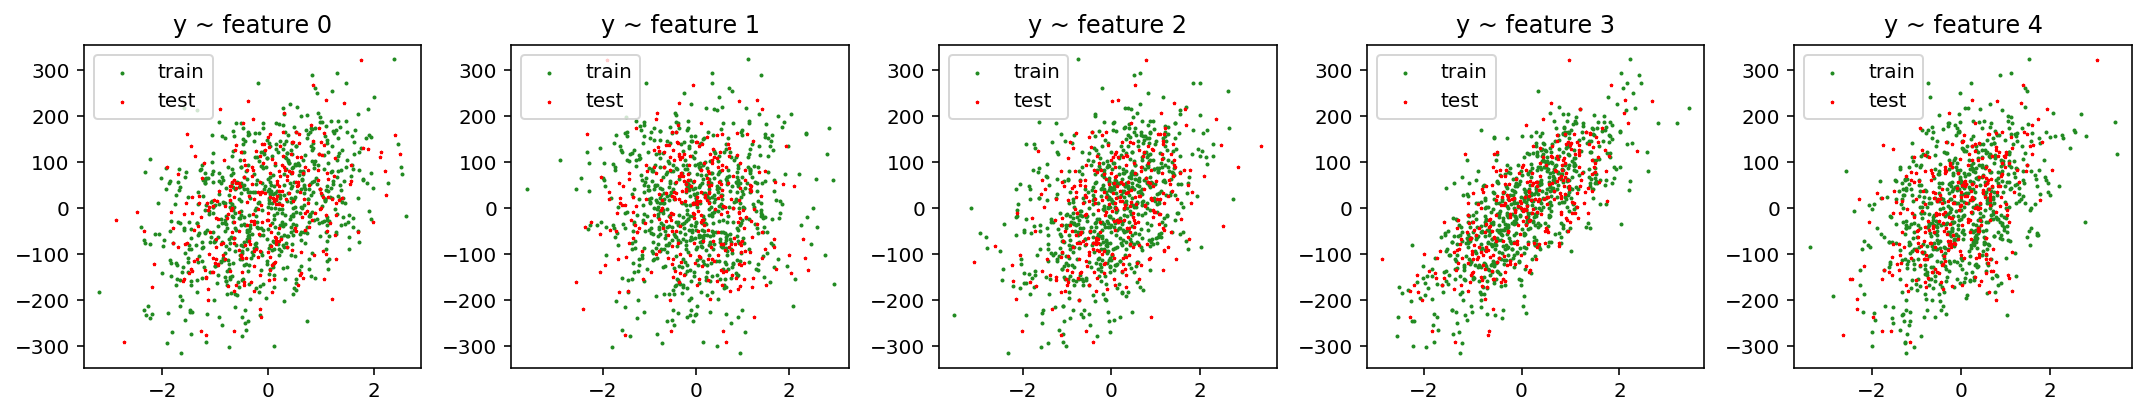

In [59]:
# Function, ................................
def train_test_scatterplots(X_tr , X_te ,y_tr, y_te, max_features=5, figsize=(10,4)):
    ''' creates scatter plots for features 
        in a train and test dataset
        . max_features - max nr of scatters plotted in one row
        . X_tr , X_te ,y_tr, y_te - input data, numpy arrays and vectors, 
        . figsize - for plt.sunplots() function
    '''
    if X_tr.shape[1]==1:
        plt.scatter(X_tr,y_tr, s=1, c="black", marker="o", label="train")  
        plt.scatter(X_te,y_te, s=1, c="red", marker="*", label="test")
        plt.legend()
    else:
        # find out how many cols/rows of axis objects to plot
        nrows = int(np.ceil(X_tr.shape[1]/max_features))
        if X_tr.shape[1]<=max_features: ncols=X_tr.shape[1]
        else: ncols=max_features
        
        # create a figure and axes, 
        fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
        i=-1
        
        # plot scatters, 
        for ax in axs.flat:
            i+=1
            if i<X.shape[1]: 
                ax.set_title(f'y ~ feature {i}')
                ax.scatter(X_tr[:,i],y_tr, s=1, c="forestgreen", marker="o", label="train")  
                ax.scatter(X_te[:,i],y_te, s=1, c="red", marker="*", label="test")
                ax.legend()
            else: pass
    plt.tight_layout()
    plt.show()
    
train_test_scatterplots(X_tr , X_te ,y_tr, y_te, figsize=(15,3))

In [60]:
X_train = tf.constant( X_tr , dtype=tf.float32 )
y_train = tf.constant( y_tr , dtype=tf.float32 ) 
                                                          
X_test = tf.constant( X_te , dtype=tf.float32 )
y_test = tf.constant( y_te , dtype=tf.float32 ) 

Creating the model in TF 2.0
We define 3 methods with TensorFlow’s low-level APIs for :
Mean Squared Error function
The derivative of Mean Squared Error function
Hypothesis function/ Regression function
which we have discussed earlier in raw Math.

In [62]:
def mean_squared_error( y , y_hat ):
    return tf.reduce_mean( tf.square( y_hat - y ) )

def mean_squared_error_deriv( y , y_hat ):
    return tf.reshape( tf.reduce_mean( 2 * ( y_hat - Y ) ) , [ 1 , 1 ] )
    
def h ( X , weights , bias ):
    return tf.tensordot( X , weights , axes=1 ) + bias

In [67]:
num_epochs = 10
num_samples = X_tr.shape[0]
batch_size = 10
learning_rate = 0.001

dataset = tf.data.Dataset.from_tensor_slices(( X_tr , y_tr )) # allows trainformaitons on tensor, 
dataset = dataset.shuffle( 100 ).repeat( num_epochs ).batch( batch_size )
#iterator = dataset.__iter__()

In [68]:
num_features = X_tr.shape[1]
weights = tf.random.normal( ( num_features , 1 ) ) 
bias = 0

epochs_plot = list()
loss_plot = list()

for i in range( num_epochs ) :
    
    epoch_loss = list()
    for b in range( int(num_samples/batch_size) ):
        x_batch , y_batch = iterator.get_next()
   
        output = h( x_batch , weights , bias ) 
        loss = epoch_loss.append( mean_squared_error( y_batch , output ).numpy() )
    
        dJ_dH = mean_squared_error_deriv( y_batch , output)
        dH_dW = x_batch
        dJ_dW = tf.reduce_mean( dJ_dH * dH_dW )
        dJ_dB = tf.reduce_mean( dJ_dH )
    
        weights -= ( learning_rate * dJ_dW )
        bias -= ( learning_rate * dJ_dB ) 
        
    loss = np.array( epoch_loss ).mean()
    epochs_plot.append( i + 1 )
    loss_plot.append( loss ) 
    
    print( 'Loss is {}'.format( loss ) ) 

NameError: name 'iterator' is not defined